In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("D:/META LAB/Excel/data_klasifikasi.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   addict       156 non-null    int64 
 1   alcohol      156 non-null    int64 
 2   anger        156 non-null    int64 
 3   anxious      156 non-null    int64 
 4   appetite     156 non-null    int64 
 5   balance      156 non-null    int64 
 6   breathe      156 non-null    int64 
 7   bulimia      156 non-null    int64 
 8   communicate  156 non-null    int64 
 9   concentrate  156 non-null    int64 
 10  confuse      156 non-null    int64 
 11  cry          156 non-null    int64 
 12  delusion     156 non-null    int64 
 13  depress      156 non-null    int64 
 14  digestive    156 non-null    int64 
 15  distrust     156 non-null    int64 
 16  dizzy        156 non-null    int64 
 17  drug         156 non-null    int64 
 18  eat          156 non-null    int64 
 19  echolalia    156 non-null    

In [4]:
# Ngasih label 0 = bipolar, 1 = non bipolar
from sklearn.preprocessing import LabelEncoder
df['Label'] = LabelEncoder().fit_transform(df['disorder'])
df.head()

,addict,alcohol,anger,anxious,appetite,balance,breathe,bulimia,communicate,concentrate,...,sweat,tire,trauma,tremble,violence,weight,withdrawal,worry,disorder,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Non Bipolar,1
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Non Bipolar,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Non Bipolar,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Non Bipolar,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Non Bipolar,1


In [6]:
# Membuat variabel X
X = df.drop(['disorder','Label'], axis = 1)

# Membuat variabel Y
y = df['Label']

In [7]:
# Membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=50)
X_train.shape, X_test.shape

((78, 57), (78, 57))

Membangun model untuk criterion = gini

In [8]:
# Membangun model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 50, criterion = "gini")
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

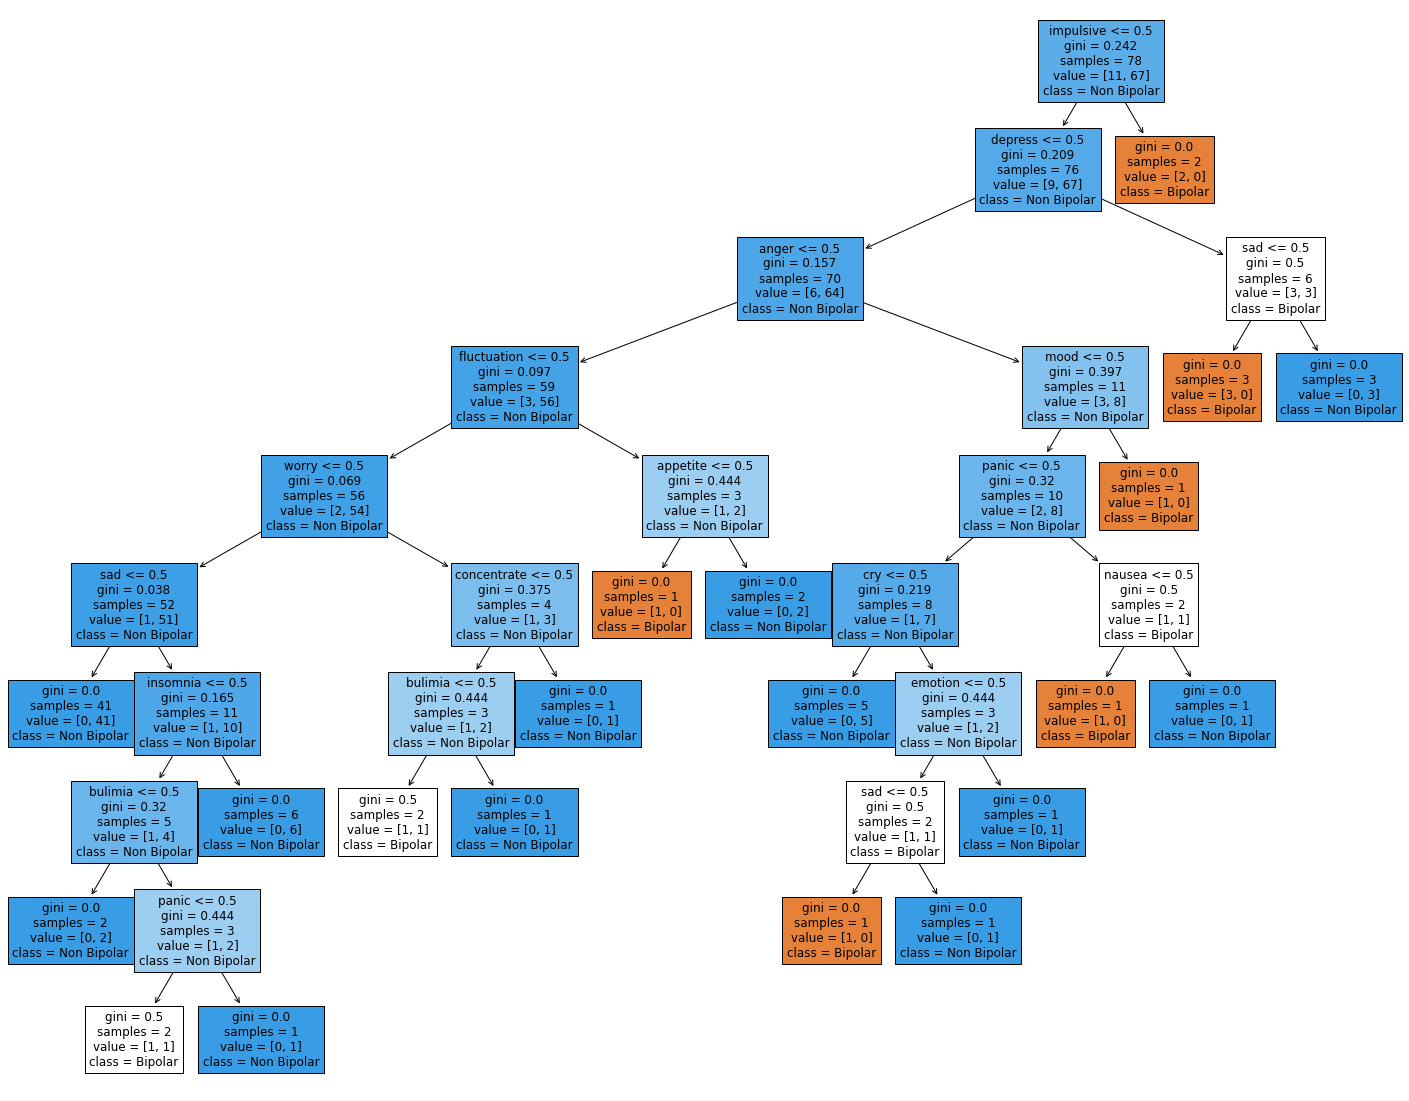

In [9]:
# Membuat grafik
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Bipolar', "Non Bipolar"],
                   filled=True)


In [10]:
# Evaluasi Model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [11]:
# Untuk data training
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9743589743589743


array([[11,  0],
       [ 2, 65]], dtype=int64)

In [12]:
# Untuk data testing
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8333333333333334


array([[10,  2],
       [11, 55]], dtype=int64)

Evaluasi Menggunakan Holdout

In [16]:
# UNTUK DATA TRAINING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_train, y_train_pred)
print(conf_matrix)

[[11  0]
 [ 2 65]]


In [18]:
akurasi=accuracy_score(y_train, y_train_pred)
presisi=precision_score(y_train, y_train_pred, pos_label=0, average=None)
recalls=recall_score(y_train,y_train_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [19]:
print(akurasi)
print(presisi)
print(recalls)

0.9743589743589743
[0.84615385 1.        ]
[1.         0.97014925]


In [20]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9743589743589743
0.9230769230769231
0.9850746268656716


In [17]:
# UNTUK DATA TESTING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[10  2]
 [11 55]]


In [21]:
akurasi=accuracy_score(y_test, y_test_pred)
presisi=precision_score(y_test, y_test_pred, pos_label=0, average=None)
recalls=recall_score(y_test,y_test_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [22]:
print(akurasi)
print(presisi)
print(recalls)

0.8333333333333334
[0.47619048 0.96491228]
[0.83333333 0.83333333]


In [23]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.8333333333333334
0.7205513784461153
0.8333333333333334


Evaluasi menggunakan Holdout Stratified

In [35]:
# UNTUK DATA TRAINING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_train, y_train_pred)
print(conf_matrix)

[[11  0]
 [ 2 65]]


In [36]:
akurasi=accuracy_score(y_train, y_train_pred)
presisi=precision_score(y_train, y_train_pred, pos_label=0, average=None)
recalls=recall_score(y_train,y_train_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [37]:
print(akurasi)
print(presisi)
print(recalls)

0.9743589743589743
[0.84615385 1.        ]
[1.         0.97014925]


In [38]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9743589743589743
0.9230769230769231
0.9850746268656716


In [40]:
# UNTUK DATA TESTING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[10  2]
 [11 55]]


In [41]:
akurasi=accuracy_score(y_test, y_test_pred)
presisi=precision_score(y_test, y_test_pred, pos_label=0, average=None)
recalls=recall_score(y_test,y_test_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [42]:
print(akurasi)
print(presisi)
print(recalls)

0.8333333333333334
[0.47619048 0.96491228]
[0.83333333 0.83333333]


In [43]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.8333333333333334
0.7205513784461153
0.8333333333333334


Evaluasi menggunakan K-Fold Validation

In [46]:
# UNTUK DATA TRAINIING

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
results_kfold

array([0.5625    , 0.75      , 0.6875    , 0.86666667, 0.8       ])

In [47]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 73.33%


In [52]:
# UNTUK DATA TESTING

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)
results_kfold

array([0.8125    , 0.8125    , 0.75      , 0.73333333, 0.93333333])

In [53]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 80.83%


In [50]:
# UNTUK DATA TRAINIING

from sklearn.model_selection import StratifiedKFold
kfold_Stra = StratifiedKFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold_Stra = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold_Stra)
results_kfold_Stra

array([0.875     , 0.875     , 0.6875    , 0.86666667, 0.6       ])

In [51]:
print("Accuracy: %.2f%%" % (results_kfold_Stra.mean()*100.0)) 

Accuracy: 78.08%


In [54]:
# UNTUK DATA TESTING

from sklearn.model_selection import StratifiedKFold
kfold_Stra = StratifiedKFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold_Stra = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold_Stra)
results_kfold_Stra

array([0.625     , 0.75      , 0.6875    , 0.8       , 0.86666667])

In [55]:
print("Accuracy: %.2f%%" % (results_kfold_Stra.mean()*100.0)) 

Accuracy: 74.58%


In [57]:
# UNTUK DATA TRAINING

from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)
results_rkfold = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_train, y_train, cv=rkfold)
results_rkfold

array([0.8125    , 0.8125    , 0.75      , 0.8       , 0.66666667,
       0.75      , 0.8125    , 0.875     , 0.53333333, 0.8       ,
       0.75      , 0.875     , 0.8125    , 0.6       , 0.73333333,
       0.875     , 0.8125    , 0.6875    , 0.86666667, 0.73333333,
       0.75      , 0.75      , 0.875     , 0.46666667, 0.93333333])

In [58]:
# UNTUK DATA TESTING

from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)
results_rkfold = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_test, y_test, cv=rkfold)
results_rkfold

array([0.875     , 0.75      , 0.625     , 0.73333333, 0.73333333,
       0.75      , 0.8125    , 0.75      , 0.86666667, 0.53333333,
       0.5625    , 0.8125    , 0.625     , 0.8       , 0.73333333,
       0.6875    , 0.75      , 0.6875    , 0.8       , 0.86666667,
       0.8125    , 0.8125    , 0.6875    , 0.66666667, 0.73333333])

Evaluasi menggunakan Leave One Out

In [60]:
# UNTUK DATA TRAINING

from sklearn.model_selection import LeaveOneOut
loocv = model_selection.LeaveOneOut()
results_loocv = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_train, y_train, cv=loocv)

In [61]:
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 71.79%


In [62]:
# UNTUK DATA TESTING

from sklearn.model_selection import LeaveOneOut
loocv = model_selection.LeaveOneOut()
results_loocv = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_test, y_test, cv=loocv)

In [63]:
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 74.36%


Membangun model untuk criterion = entropy

In [66]:
# Membangun model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 50, criterion = "entropy")
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

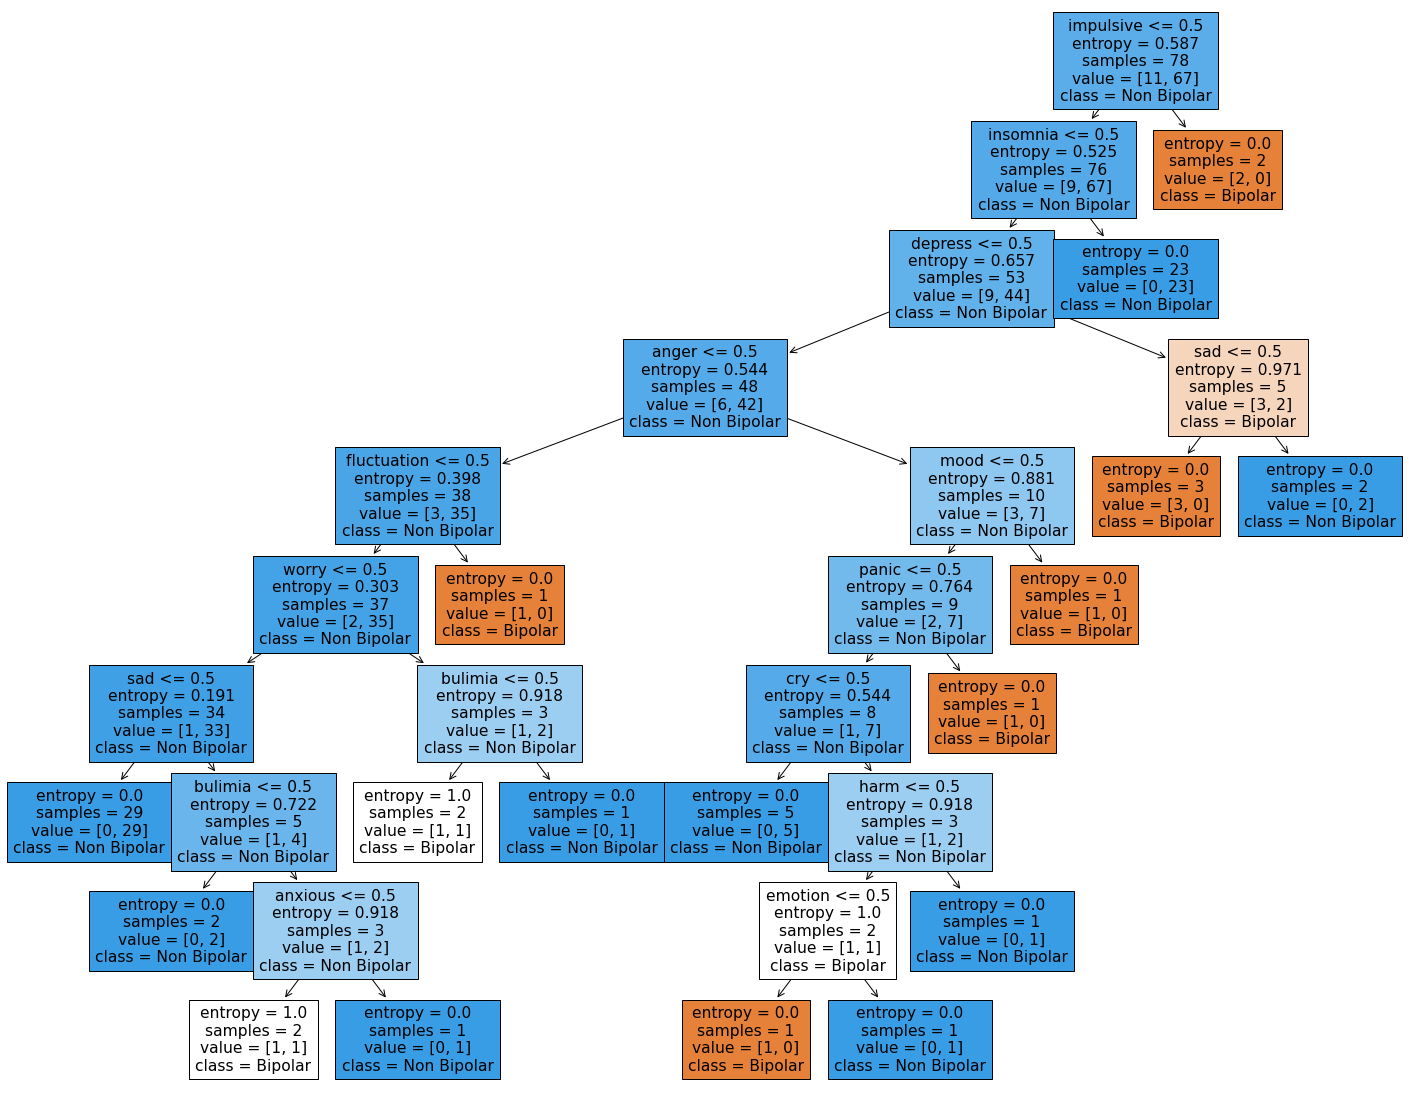

In [67]:
# Membuat grafik
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Bipolar', "Non Bipolar"],
                   filled=True)

In [68]:
# Evaluasi Model
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [69]:
# Untuk data training
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9743589743589743


array([[11,  0],
       [ 2, 65]], dtype=int64)

In [70]:
# Untuk data testing
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7948717948717948


array([[ 5,  7],
       [ 9, 57]], dtype=int64)

Evaluasi Menggunakan Holdout

In [71]:
# UNTUK DATA TRAINING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_train, y_train_pred)
print(conf_matrix)

[[11  0]
 [ 2 65]]


In [72]:
akurasi=accuracy_score(y_train, y_train_pred)
presisi=precision_score(y_train, y_train_pred, pos_label=0, average=None)
recalls=recall_score(y_train,y_train_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [73]:
print(akurasi)
print(presisi)
print(recalls)

0.9743589743589743
[0.84615385 1.        ]
[1.         0.97014925]


In [74]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9743589743589743
0.9230769230769231
0.9850746268656716


In [75]:
# UNTUK DATA TESTING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[ 5  7]
 [ 9 57]]


In [76]:
akurasi=accuracy_score(y_test, y_test_pred)
presisi=precision_score(y_test, y_test_pred, pos_label=0, average=None)
recalls=recall_score(y_test,y_test_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [77]:
print(akurasi)
print(presisi)
print(recalls)

0.7948717948717948
[0.35714286 0.890625  ]
[0.41666667 0.86363636]


In [78]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.7948717948717948
0.6238839285714286
0.6401515151515151


Evaluasi menggunakan Holdout Stratified

In [79]:
# UNTUK DATA TRAINING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_train, y_train_pred)
print(conf_matrix)

[[11  0]
 [ 2 65]]


In [80]:
akurasi=accuracy_score(y_train, y_train_pred)
presisi=precision_score(y_train, y_train_pred, pos_label=0, average=None)
recalls=recall_score(y_train,y_train_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [81]:
print(akurasi)
print(presisi)
print(recalls)

0.9743589743589743
[0.84615385 1.        ]
[1.         0.97014925]


In [82]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.9743589743589743
0.9230769230769231
0.9850746268656716


In [83]:
# UNTUK DATA TESTING

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conf_matrix=confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[ 5  7]
 [ 9 57]]


In [85]:
akurasi=accuracy_score(y_test, y_test_pred)
presisi=precision_score(y_test, y_test_pred, pos_label=0, average=None)
recalls=recall_score(y_test,y_test_pred, pos_label=0, average=None)

C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [86]:
print(akurasi)
print(presisi)
print(recalls)

0.7948717948717948
[0.35714286 0.890625  ]
[0.41666667 0.86363636]


In [87]:
print(akurasi)
print(presisi.mean())
print(recalls.mean())

0.7948717948717948
0.6238839285714286
0.6401515151515151


Evaluasi menggunakan K-Fold Validation

In [88]:
# UNTUK DATA TRAINIING

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
results_kfold

array([0.5625    , 0.75      , 0.6875    , 0.86666667, 0.8       ])

In [89]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 73.33%


In [90]:
# UNTUK DATA TESTING

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)
results_kfold

array([0.8125    , 0.8125    , 0.75      , 0.73333333, 0.93333333])

In [91]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 80.83%


In [92]:
# UNTUK DATA TRAINIING

from sklearn.model_selection import StratifiedKFold
kfold_Stra = StratifiedKFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold_Stra = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold_Stra)
results_kfold_Stra

array([0.875     , 0.875     , 0.6875    , 0.86666667, 0.6       ])

In [93]:
print("Accuracy: %.2f%%" % (results_kfold_Stra.mean()*100.0)) 

Accuracy: 78.08%


In [94]:
# UNTUK DATA TESTING

from sklearn.model_selection import StratifiedKFold
kfold_Stra = StratifiedKFold(n_splits=5)
model_kfold = DecisionTreeClassifier(random_state = 50, criterion = "gini")
results_kfold_Stra = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold_Stra)
results_kfold_Stra

array([0.625     , 0.75      , 0.6875    , 0.8       , 0.86666667])

In [96]:
print("Accuracy: %.2f%%" % (results_kfold_Stra.mean()*100.0)) 

Accuracy: 74.58%


In [97]:
# UNTUK DATA TRAINING

from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)
results_rkfold = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_train, y_train, cv=rkfold)
results_rkfold

array([0.75      , 0.8125    , 0.8125    , 0.73333333, 0.73333333,
       0.5625    , 0.9375    , 0.5625    , 0.66666667, 0.53333333,
       0.75      , 0.75      , 0.75      , 0.73333333, 0.8       ,
       0.8125    , 0.6875    , 0.8125    , 0.73333333, 0.6       ,
       0.8125    , 0.5       , 0.8125    , 0.8       , 0.6       ])

In [98]:
# UNTUK DATA TESTING

from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)
results_rkfold = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_test, y_test, cv=rkfold)
results_rkfold

array([0.625     , 0.75      , 0.8125    , 0.66666667, 0.8       ,
       0.75      , 0.6875    , 0.625     , 0.53333333, 0.6       ,
       0.625     , 0.75      , 0.625     , 0.93333333, 0.8       ,
       0.6875    , 0.6875    , 0.8125    , 0.73333333, 0.73333333,
       0.6875    , 0.875     , 0.5625    , 0.86666667, 0.66666667])

Evaluasi menggunakan Leave One Out

In [99]:
# UNTUK DATA TRAINING

from sklearn.model_selection import LeaveOneOut
loocv = model_selection.LeaveOneOut()
results_loocv = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_train, y_train, cv=loocv)

In [100]:
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 71.79%


In [101]:
# UNTUK DATA TESTING

from sklearn.model_selection import LeaveOneOut
loocv = model_selection.LeaveOneOut()
results_loocv = model_selection.cross_val_score(DecisionTreeClassifier(random_state = 50, criterion = "gini"), X_test, y_test, cv=loocv)

In [102]:
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 74.36%


Creating helper functions to evaluate model performance and help plot the decision tree

In [12]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Bipolar', 'Non Bipolar'],
                       filled=True)

In [13]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Without setting any hyper-parameters

In [14]:
dt_default = DecisionTreeClassifier(random_state=50)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

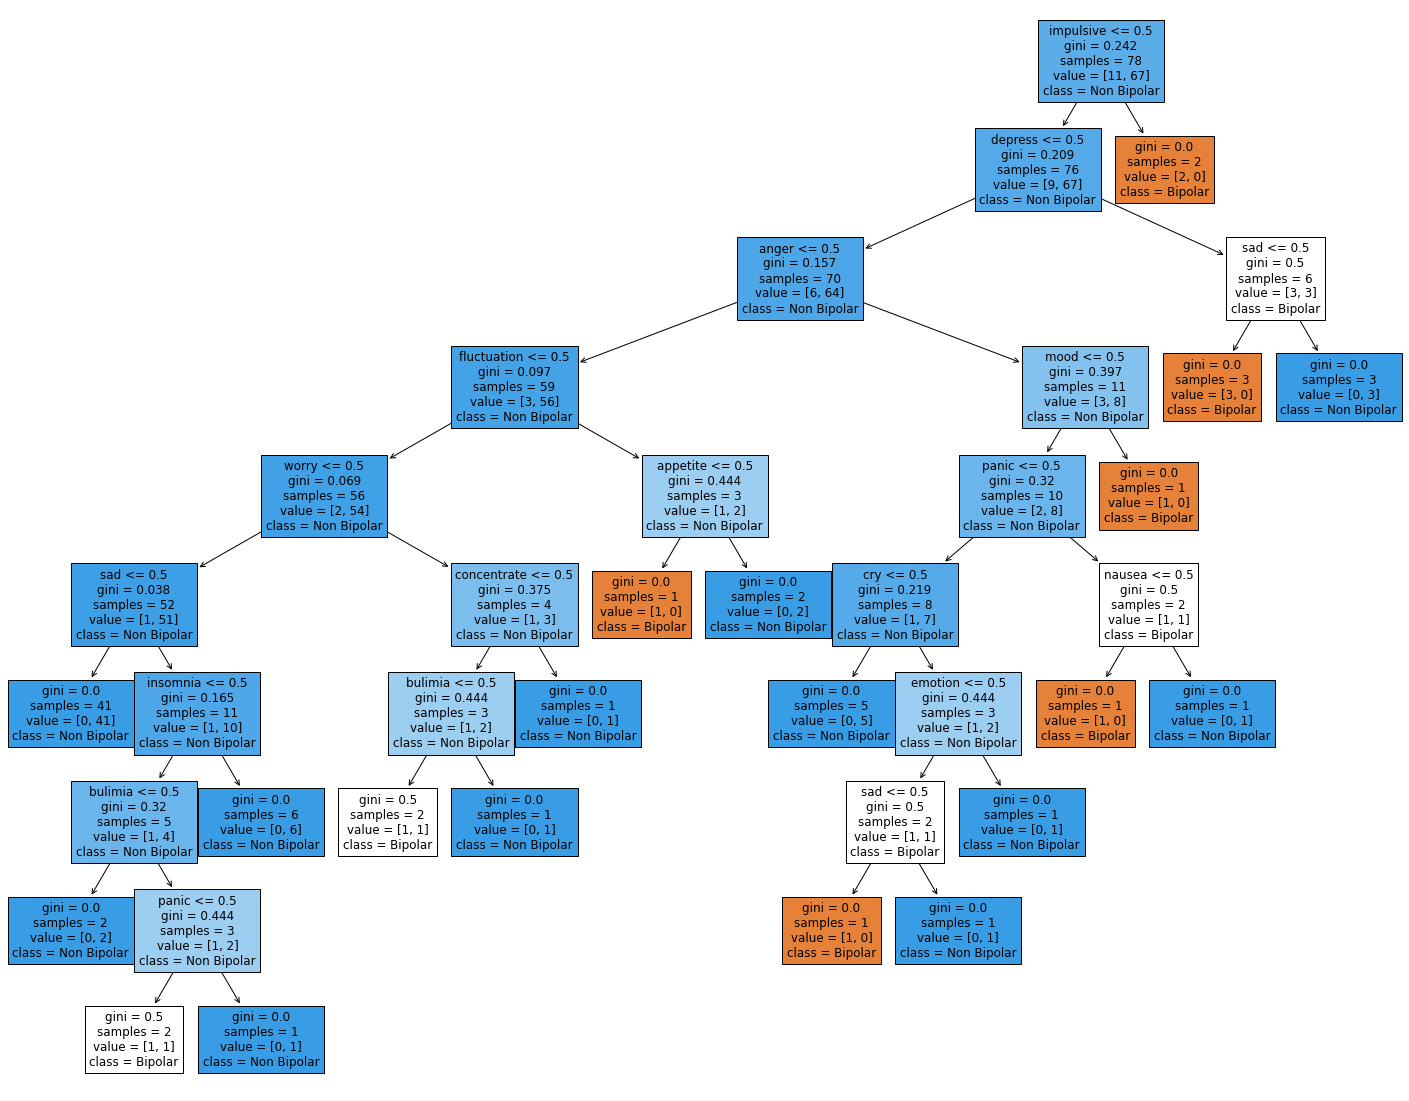

In [15]:
gph = get_dt_graph(dt_default)

In [16]:
evaluate_model(dt_default)

Train Accuracy : 0.9743589743589743
Train Confusion Matrix:
[[11  0]
 [ 2 65]]
--------------------------------------------------
Test Accuracy : 0.8333333333333334
Test Confusion Matrix:
[[10  2]
 [11 55]]


Controlling the depth of the tree

In [17]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

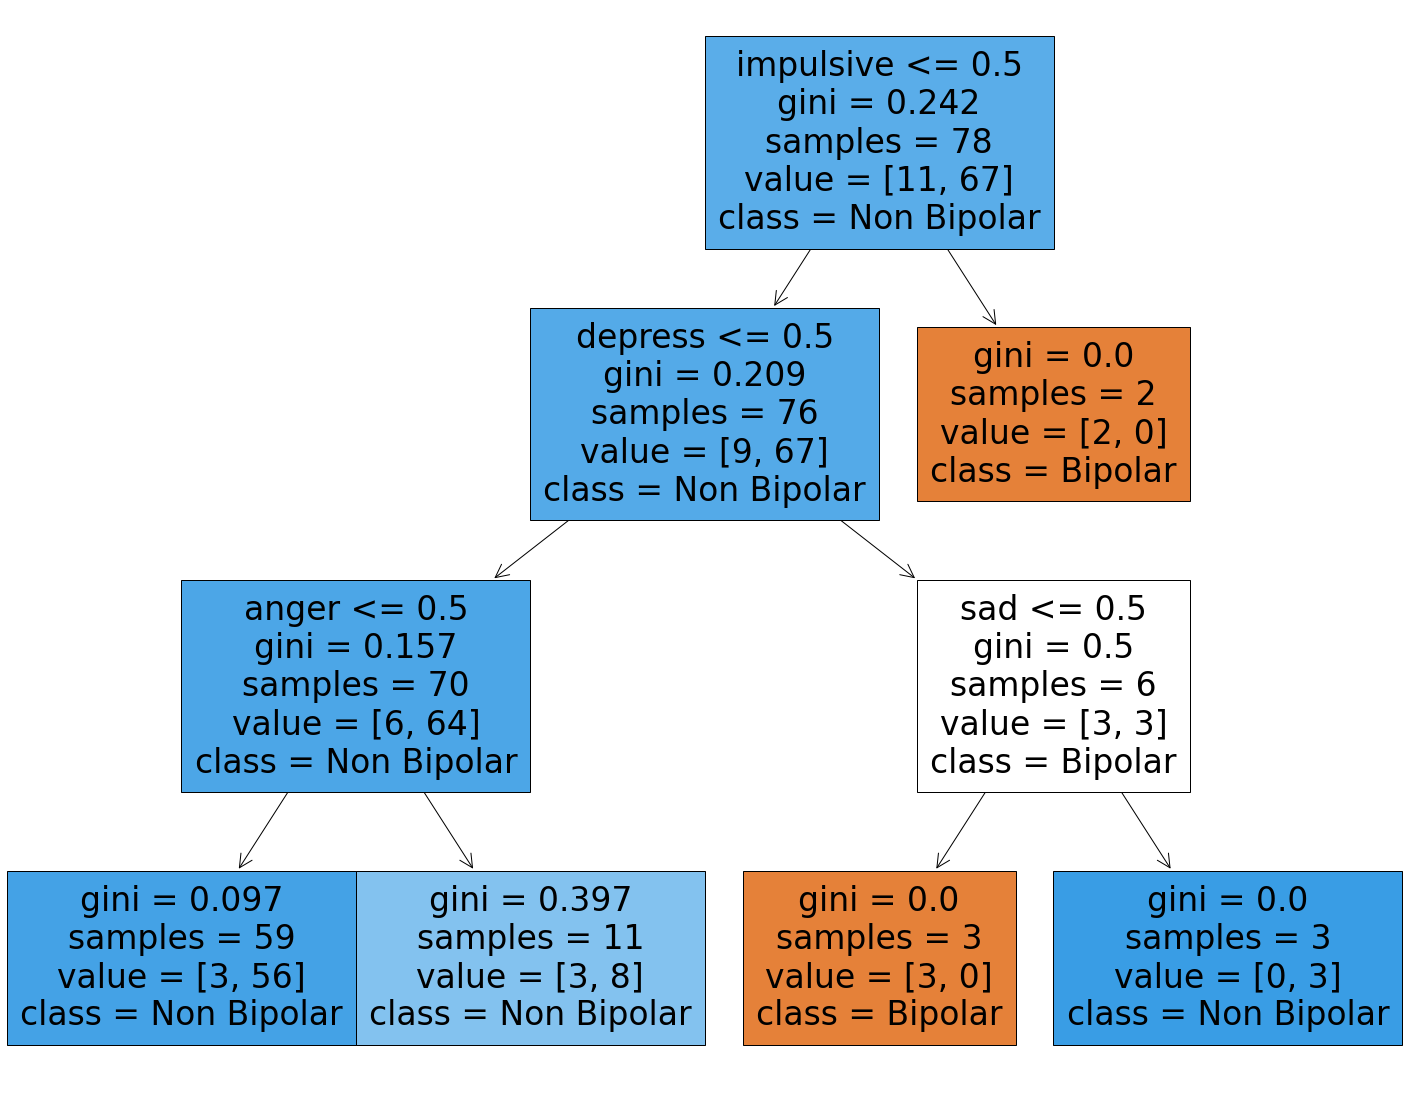

In [18]:
gph = get_dt_graph(dt_depth) 

In [19]:
evaluate_model(dt_depth)

Train Accuracy : 0.9230769230769231
Train Confusion Matrix:
[[ 5  6]
 [ 0 67]]
--------------------------------------------------
Test Accuracy : 0.8589743589743589
Test Confusion Matrix:
[[ 4  8]
 [ 3 63]]


Specifying minimum samples before split

dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

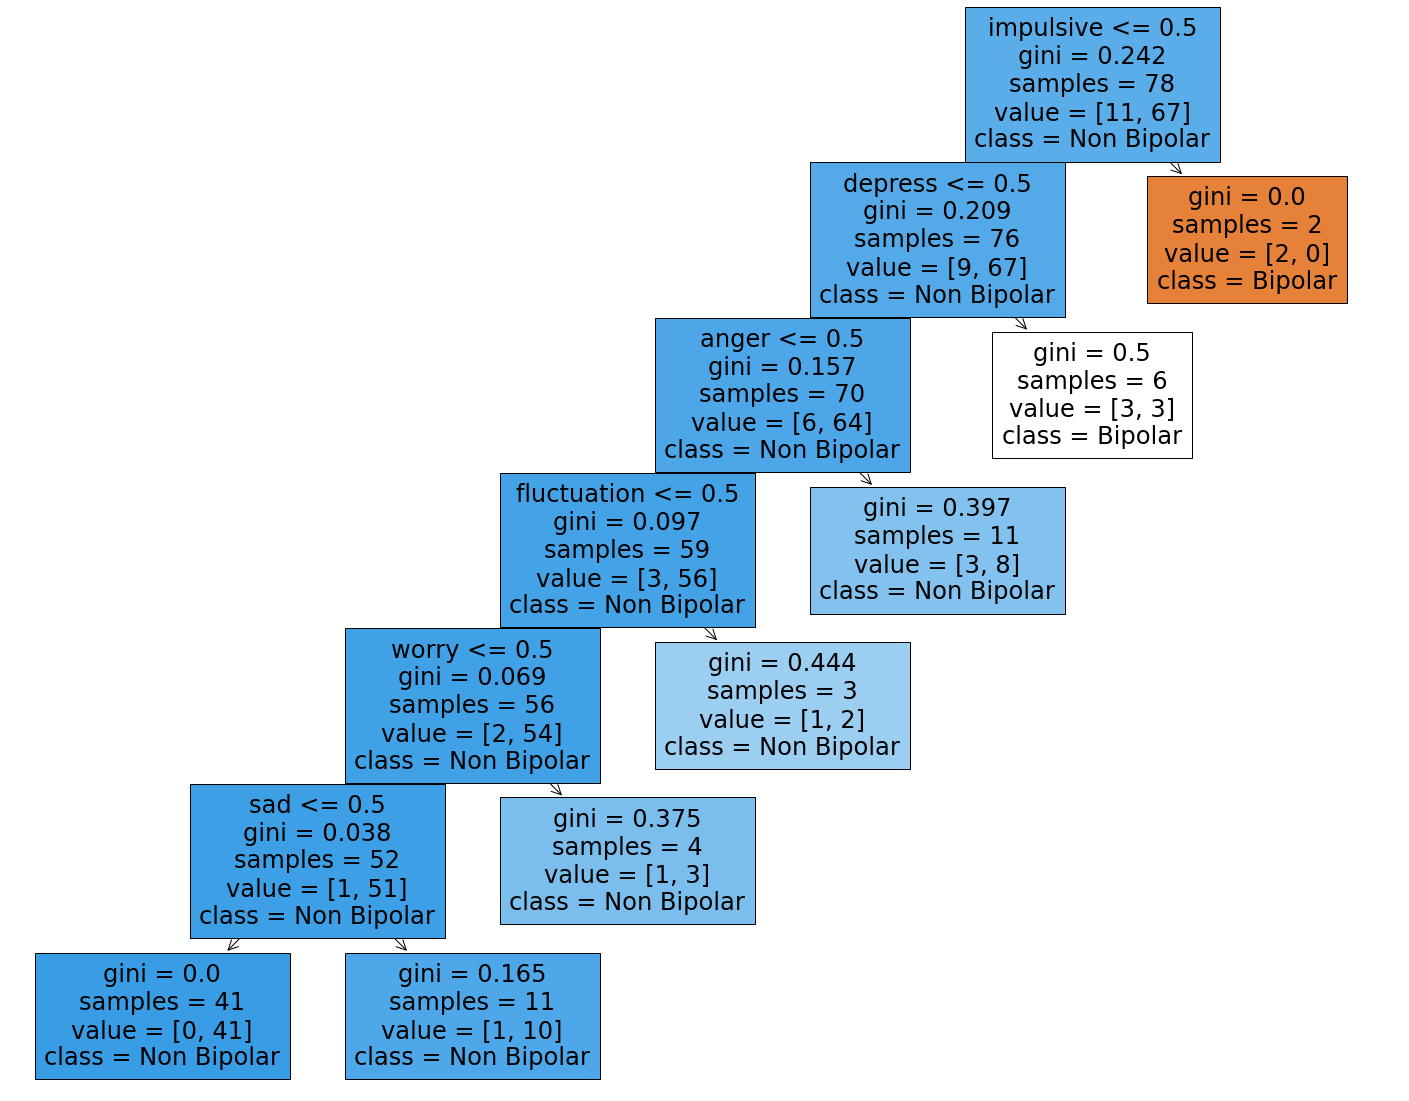

In [21]:
gph = get_dt_graph(dt_min_split) 

In [22]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8846153846153846
Train Confusion Matrix:
[[ 5  6]
 [ 3 64]]
--------------------------------------------------
Test Accuracy : 0.8589743589743589
Test Confusion Matrix:
[[ 5  7]
 [ 4 62]]


Specifying minimum samples in leaf node

In [23]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=50)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=50)

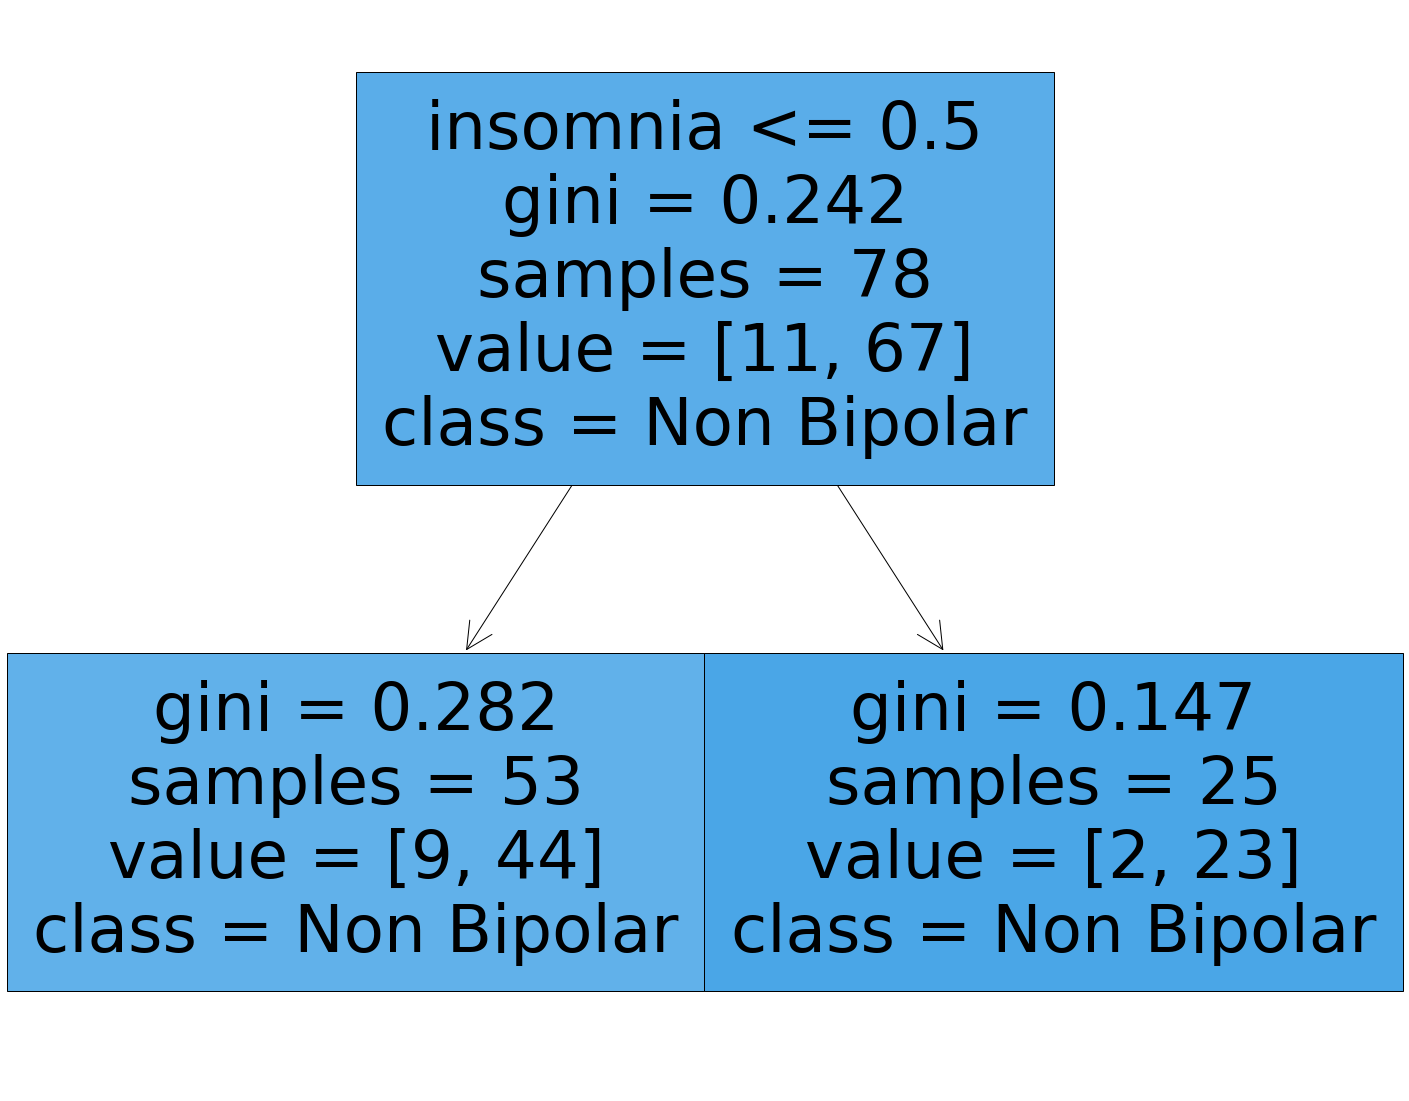

In [24]:
gph = get_dt_graph(dt_min_leaf)

In [25]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.8589743589743589
Train Confusion Matrix:
[[ 0 11]
 [ 0 67]]
--------------------------------------------------
Test Accuracy : 0.8461538461538461
Test Confusion Matrix:
[[ 0 12]
 [ 0 66]]


Using Entropy instead of Gini

In [26]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=50, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=50)

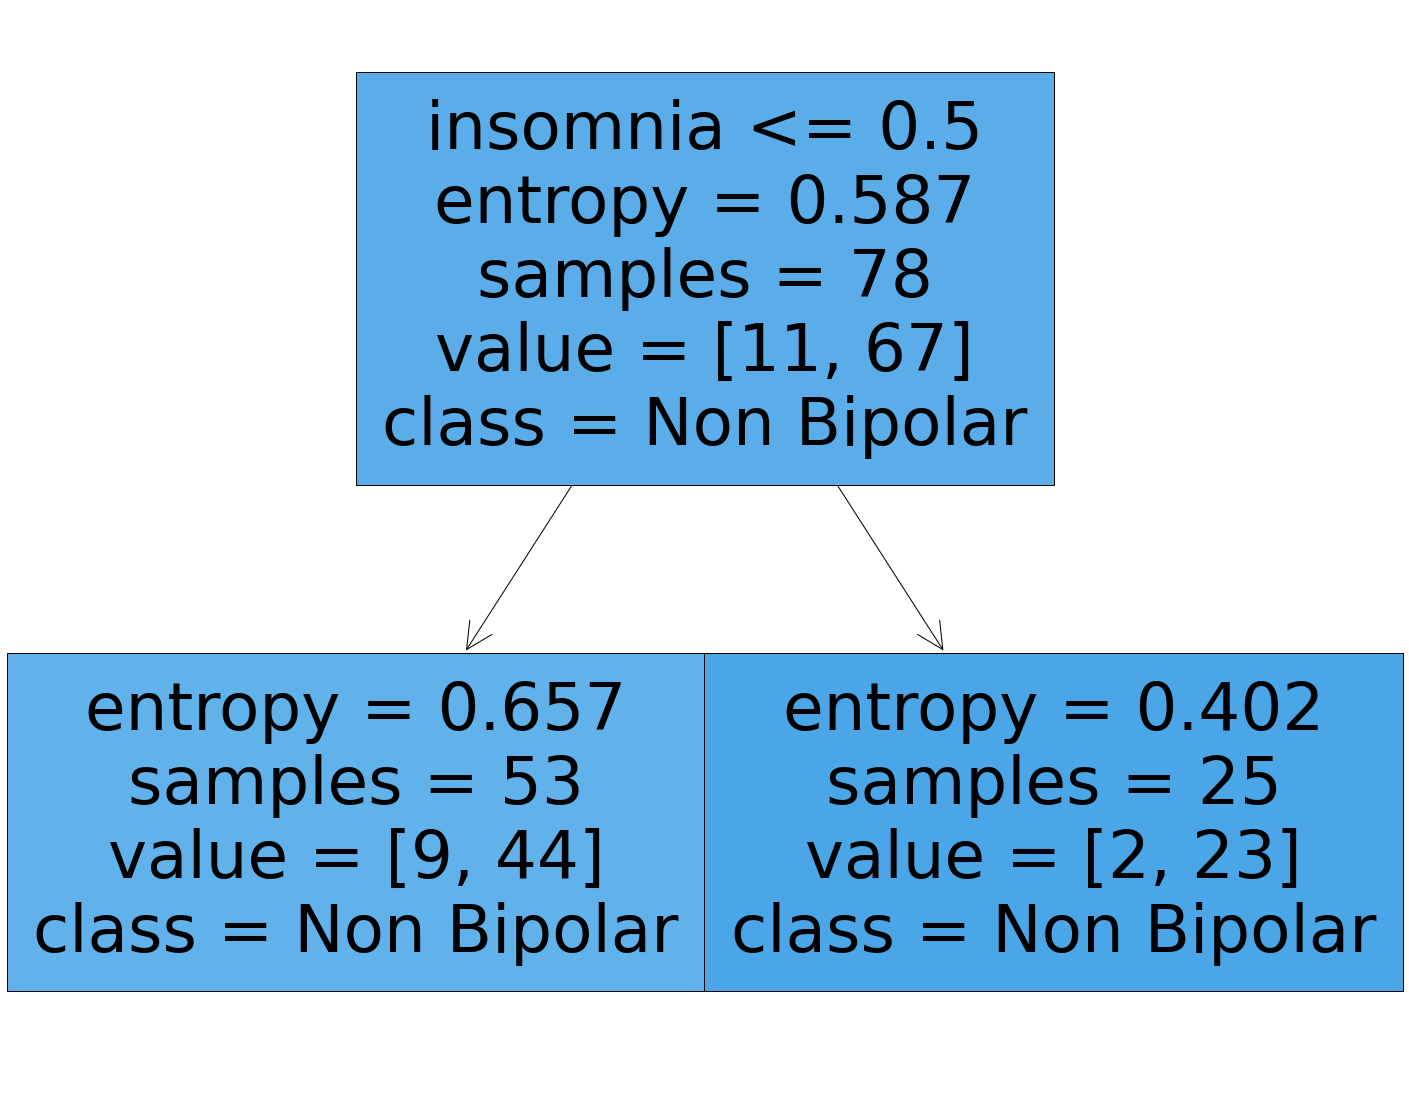

In [27]:
gph = get_dt_graph(dt_min_leaf_entropy)

In [28]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.8589743589743589
Train Confusion Matrix:
[[ 0 11]
 [ 0 67]]
--------------------------------------------------
Test Accuracy : 0.8461538461538461
Test Confusion Matrix:
[[ 0 12]
 [ 0 66]]


Hyper-parameter tuning

In [29]:
dt = DecisionTreeClassifier(random_state=50)

In [30]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [31]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [32]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 10.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [33]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010115,0.003209,0.006426,0.001829,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.789474,0.894737,0.846053,0.037425,41
1,0.013123,0.003483,0.009420,0.001060,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
2,0.012199,0.004195,0.009240,0.001738,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
3,0.011810,0.003480,0.010337,0.002699,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
4,0.013242,0.003921,0.006869,0.004293,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1


In [34]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,0.013123,0.003483,0.009420,0.001060,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
2,0.012199,0.004195,0.009240,0.001738,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
3,0.011810,0.003480,0.010337,0.002699,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
4,0.013242,0.003921,0.006869,0.004293,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1
6,0.010148,0.003424,0.007512,0.004452,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.85,0.85,0.842105,0.894737,0.859211,0.020763,1


In [35]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=50)

In [36]:
dt_best = grid_search.best_estimator_

In [37]:
evaluate_model(dt_best)

Train Accuracy : 0.8589743589743589
Train Confusion Matrix:
[[ 0 11]
 [ 0 67]]
--------------------------------------------------
Test Accuracy : 0.8461538461538461
Test Confusion Matrix:
[[ 0 12]
 [ 0 66]]


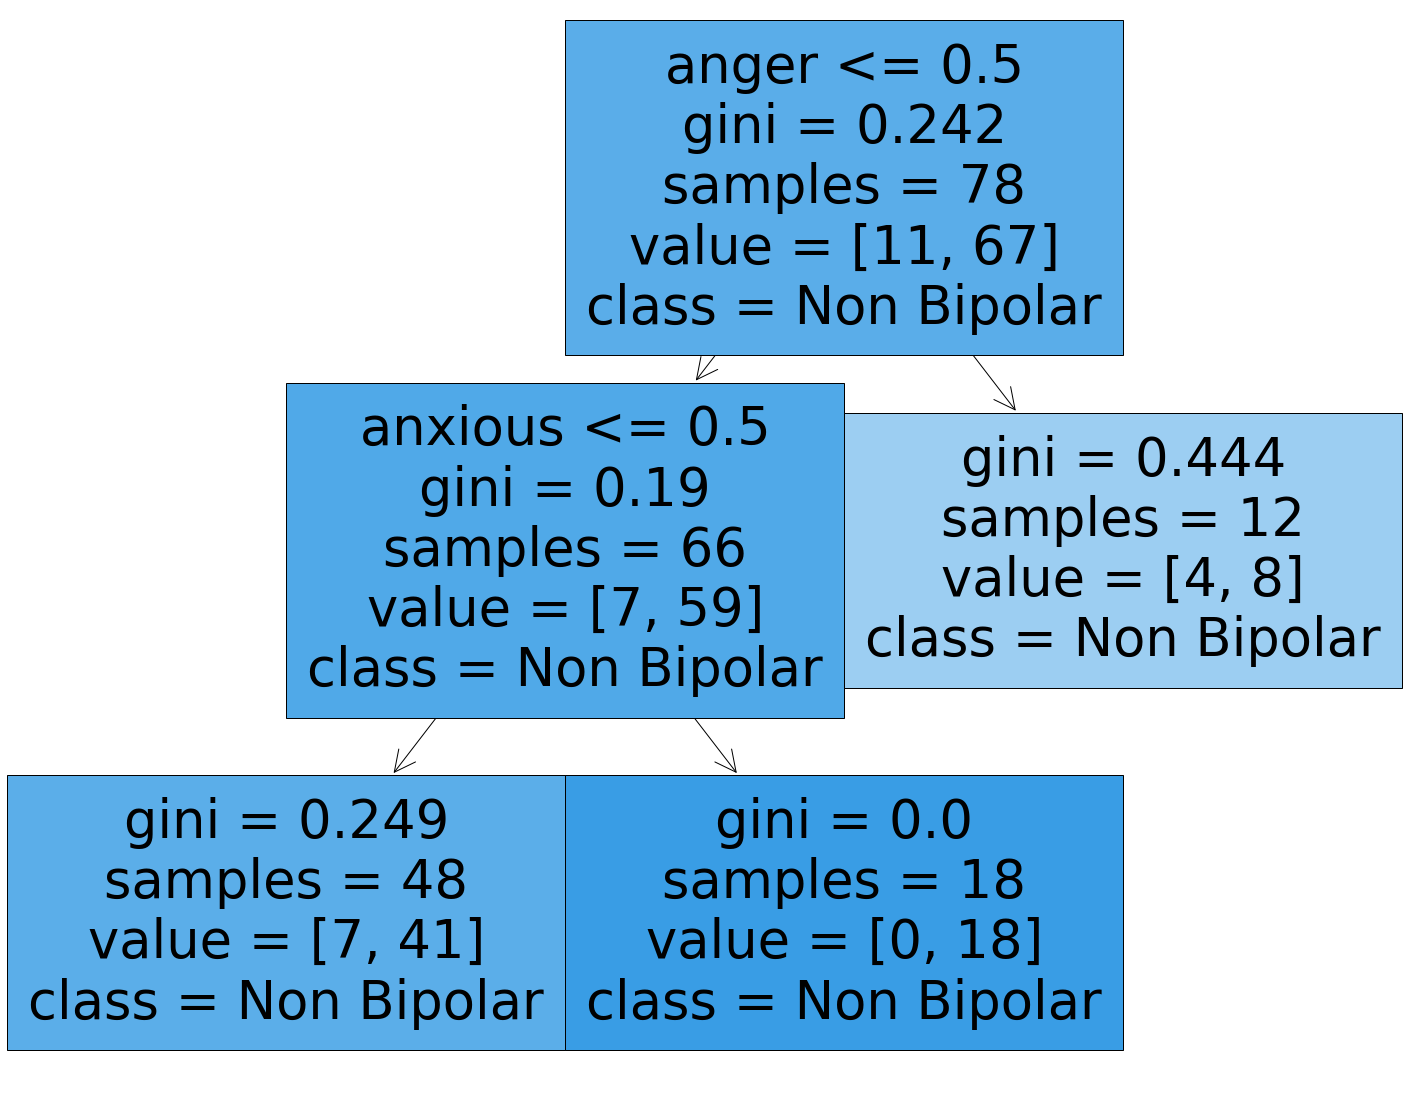

In [38]:
get_dt_graph(dt_best)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.85      1.00      0.92        66

    accuracy                           0.85        78
   macro avg       0.42      0.50      0.46        78
weighted avg       0.72      0.85      0.78        78



C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zalramli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
